### *Задание*

-----

<br>

Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source). Таким образом после вашего анализа, я хочу увидеть небольшое описание нашего целевого клиента с соответствующими визуализациями и статистическими выводами, что мы и прошли с вами на лекции. Используйте по максимуму ваши знания работы с датасетом (обработка, предобработка и приведение его к виду с которым можно работать).

<br>

Критерии оценки задания:

1. Правильность и **подкрепленность выводами вашего статистического анализа** (используйте весь доступный вам инструментарий, какой - решите самостоятельно).
2. Корректность использования графиков при графическом анализе. Не надо визуализировать все, что у вас есть в датасете, **подумайте какие признаки и какие взамосвязи можно и нужно показать, какие распределения важно отобразить.**
3. Оформление и **эффективное использование кода.**

**Максимальный балл за решение текущего задания 5 баллов.**

Покажите, как вы можете самостоятельно работать с данными и ваше аналитическое мышление, подкрепленное цифрами и соответствующими выводами.
Удачи.

#### 1. Получаем данные из базы (в нашем случае из файла)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./clients.csv", index_col=False)

#### 2. Проводим базовое знакомство с датасетом

##### 2.1 Выводим первые 5 строк датасета для получения общего представления о нём

In [3]:
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


##### 2.2 Выводим базовую информацию о нашем датасете

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

Уже здесь мы видим, что пропуски присутствуют.<br>Признаки с пропусками: Age at time of purchase', 'Age Interval ', 'Y', 'M', 'D', 'Gender', 'Country', 'State'.

##### 2.3 Выводим список названий признаков

In [5]:
df.columns

Index(['ID', 'Building', 'Year of sale', 'Month of sale', 'Type of property',
       'Property number', 'Area (ft.)', 'Price', 'Status', 'Customer ID',
       'Entity', 'Name', 'Surname', 'Age at time of purchase', 'Age Interval ',
       'Y', 'M', 'D', 'Gender', 'Country', 'State', 'Purpose',
       'Deal satisfaction', 'Mortgage', 'Source'],
      dtype='object')

Видно, что названия признаков содержат пробелы, буквы верхнего и нижнего регистра, скобки. Признака 'Age Interval ' так же содержит пробел в конце.

Для удобства работы приведём все символы в названиях признаков к однму (нижнему) регистру, избавимся от скобок, знаков пунктуации и пробелов по краям в названиях и заменим оставшиеся пробелы на знак нижнего подчёркивания.

In [6]:
df.columns=df.columns.str.strip().str.lower().str.replace(r'[\(\).]','',regex=True).str.replace(r' +', '_', regex=True)

In [7]:
df.entity.unique()

array(['Individual', 'Firm'], dtype=object)

In [8]:
df.head()

,id,building,year_of_sale,month_of_sale,type_of_property,property_number,area_ft,price,status,customer_id,...,y,m,d,gender,country,state,purpose,deal_satisfaction,mortgage,source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


##### 2.2 Приводим price к численному значению

По выводам данных выше видно, что признак price, хранящий, по сути, числовое значение, представлен в виде строки.<br>Приведём этот признак к типу float.

In [9]:
df['price'] = df['price'].str.replace(',', '').str.extract(r'(\d+(?:,\d+)*(?:\.\d+)?)').astype(float)

##### 2.2 Выводим базовую статистику по признакам в рамках нашего датасета

In [10]:
df.describe()

,id,building,year_of_sale,month_of_sale,property_number,area_ft,price,age_at_time_of_purchase,y,m,d,deal_satisfaction
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,178.000000,178.000000,178.000000,178.000000,195.000000
mean,2591.425641,2.564103,2006.333333,7.271795,27.328205,899.867128,269434.560923,46.151685,1960.325843,6.752809,15.449438,3.605128
std,1244.617996,1.243434,1.072941,3.378674,14.830832,261.489550,80129.094465,12.841692,12.835575,3.450312,8.457285,1.363355
min,1002.000000,1.000000,2004.000000,1.000000,1.000000,410.710000,117564.070000,19.000000,1931.000000,1.000000,1.000000,1.000000
25%,2003.500000,2.000000,2006.000000,4.000000,15.000000,739.860000,212393.250000,37.000000,1950.250000,4.000000,8.000000,3.000000
50%,2054.000000,2.000000,2007.000000,8.000000,27.000000,785.480000,243052.590000,45.000000,1962.000000,6.000000,15.000000,4.000000
75%,3048.500000,3.000000,2007.000000,10.000000,39.000000,1075.460000,308550.875000,55.000000,1969.750000,9.750000,23.750000,5.000000
max,5051.000000,5.000000,2010.000000,12.000000,59.000000,1942.500000,529317.280000,76.000000,1986.000000,15.000000,31.000000,5.000000


Можем увидеть, что выбросов по числовым признакам в нашем датасете нет. Значения валидные.

#### 3. Анализ и обработка коллинеарных признаков

##### 3.1 Выводим тепловую карту корреляции признакового пространства

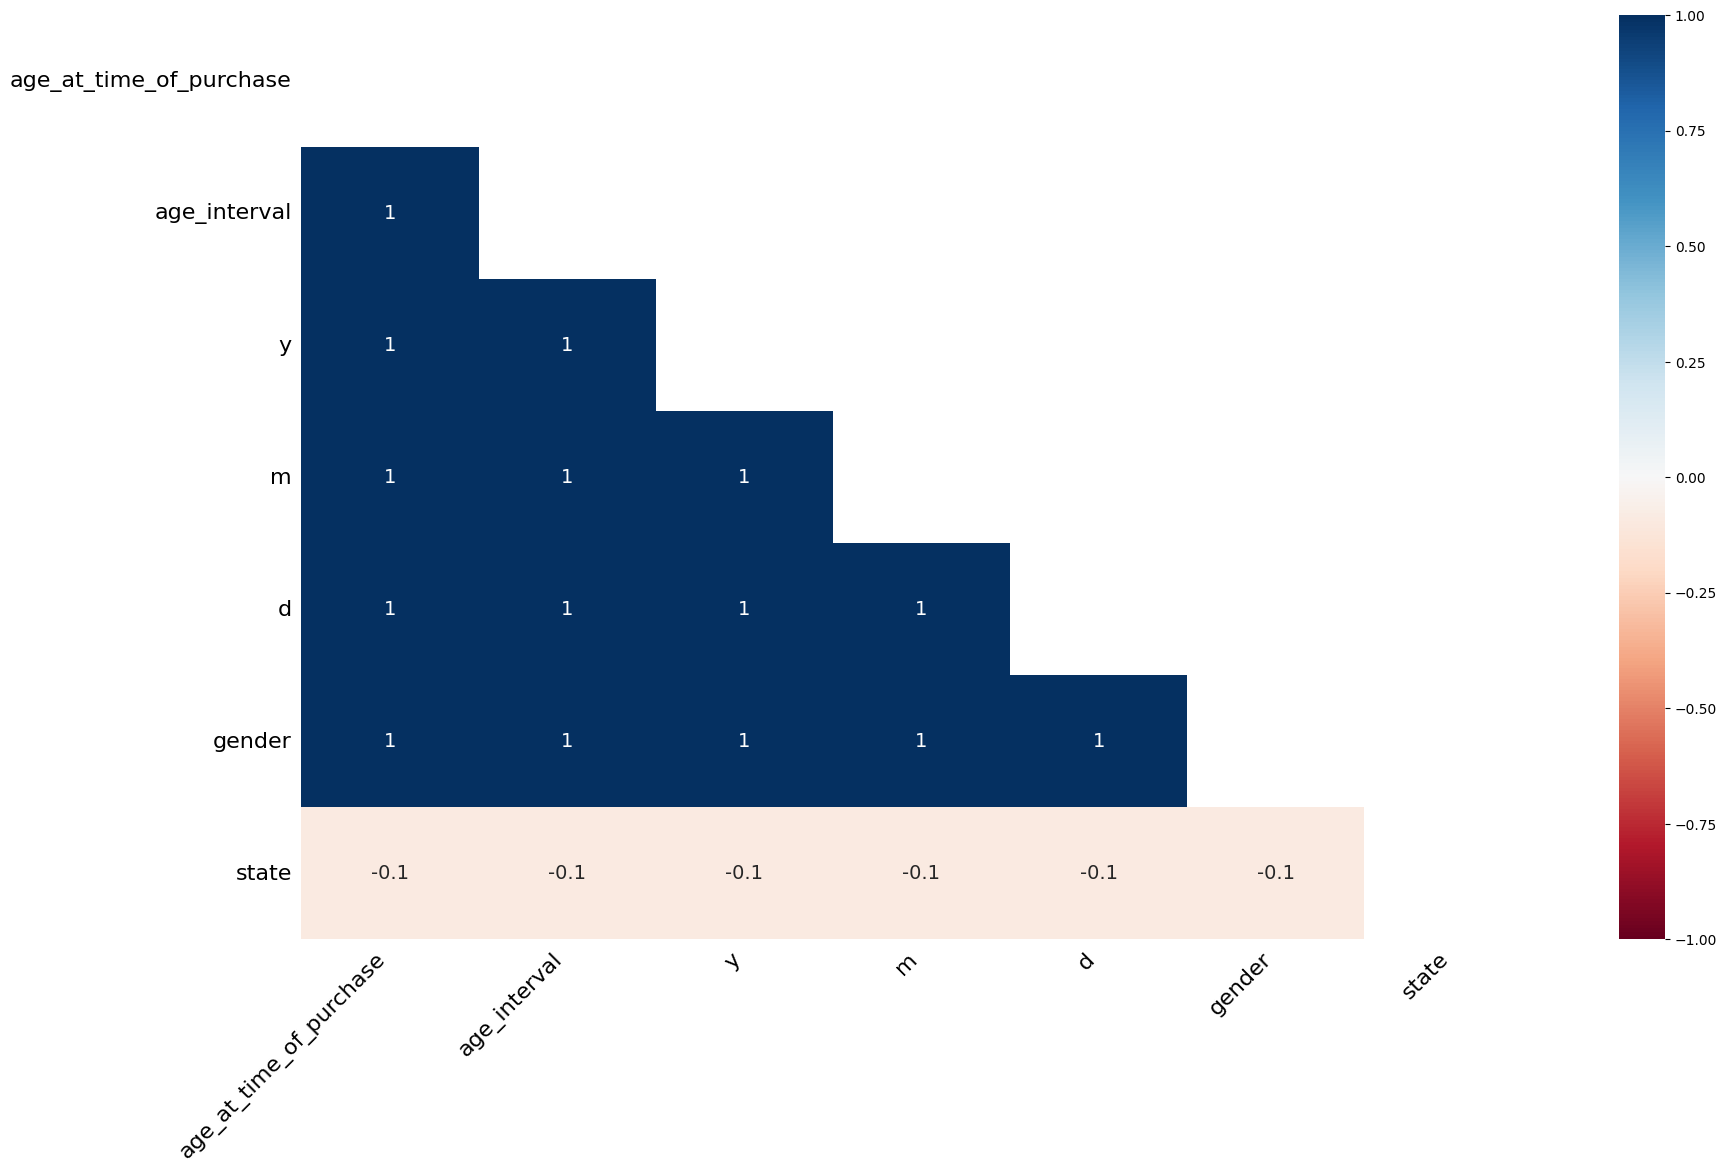

In [11]:
import missingno as msno
msno.heatmap(df, labels = True);

По тепловой карте видно, что признак 'Age at time of purchase' коррелирует с признаками 'Age Interval', 'Y', 'M', 'D'.<br>Для описания портрета целевого клиента нам будет достаточно категориального признака 'Age Interval', поэтому от признаков 'Age at time of purchase', 'Y', 'M', 'D', содержащих доп. информацию о возрасте клиента, мы можем избравиться.

##### 3.2 Избавляемся от дублирующих признаков

Важно уточнить, что дублирующие признаки 'age_at_time_of_purchase', 'y', 'm', 'd' пропущены там же, где пропущен признак 'age_interval'.

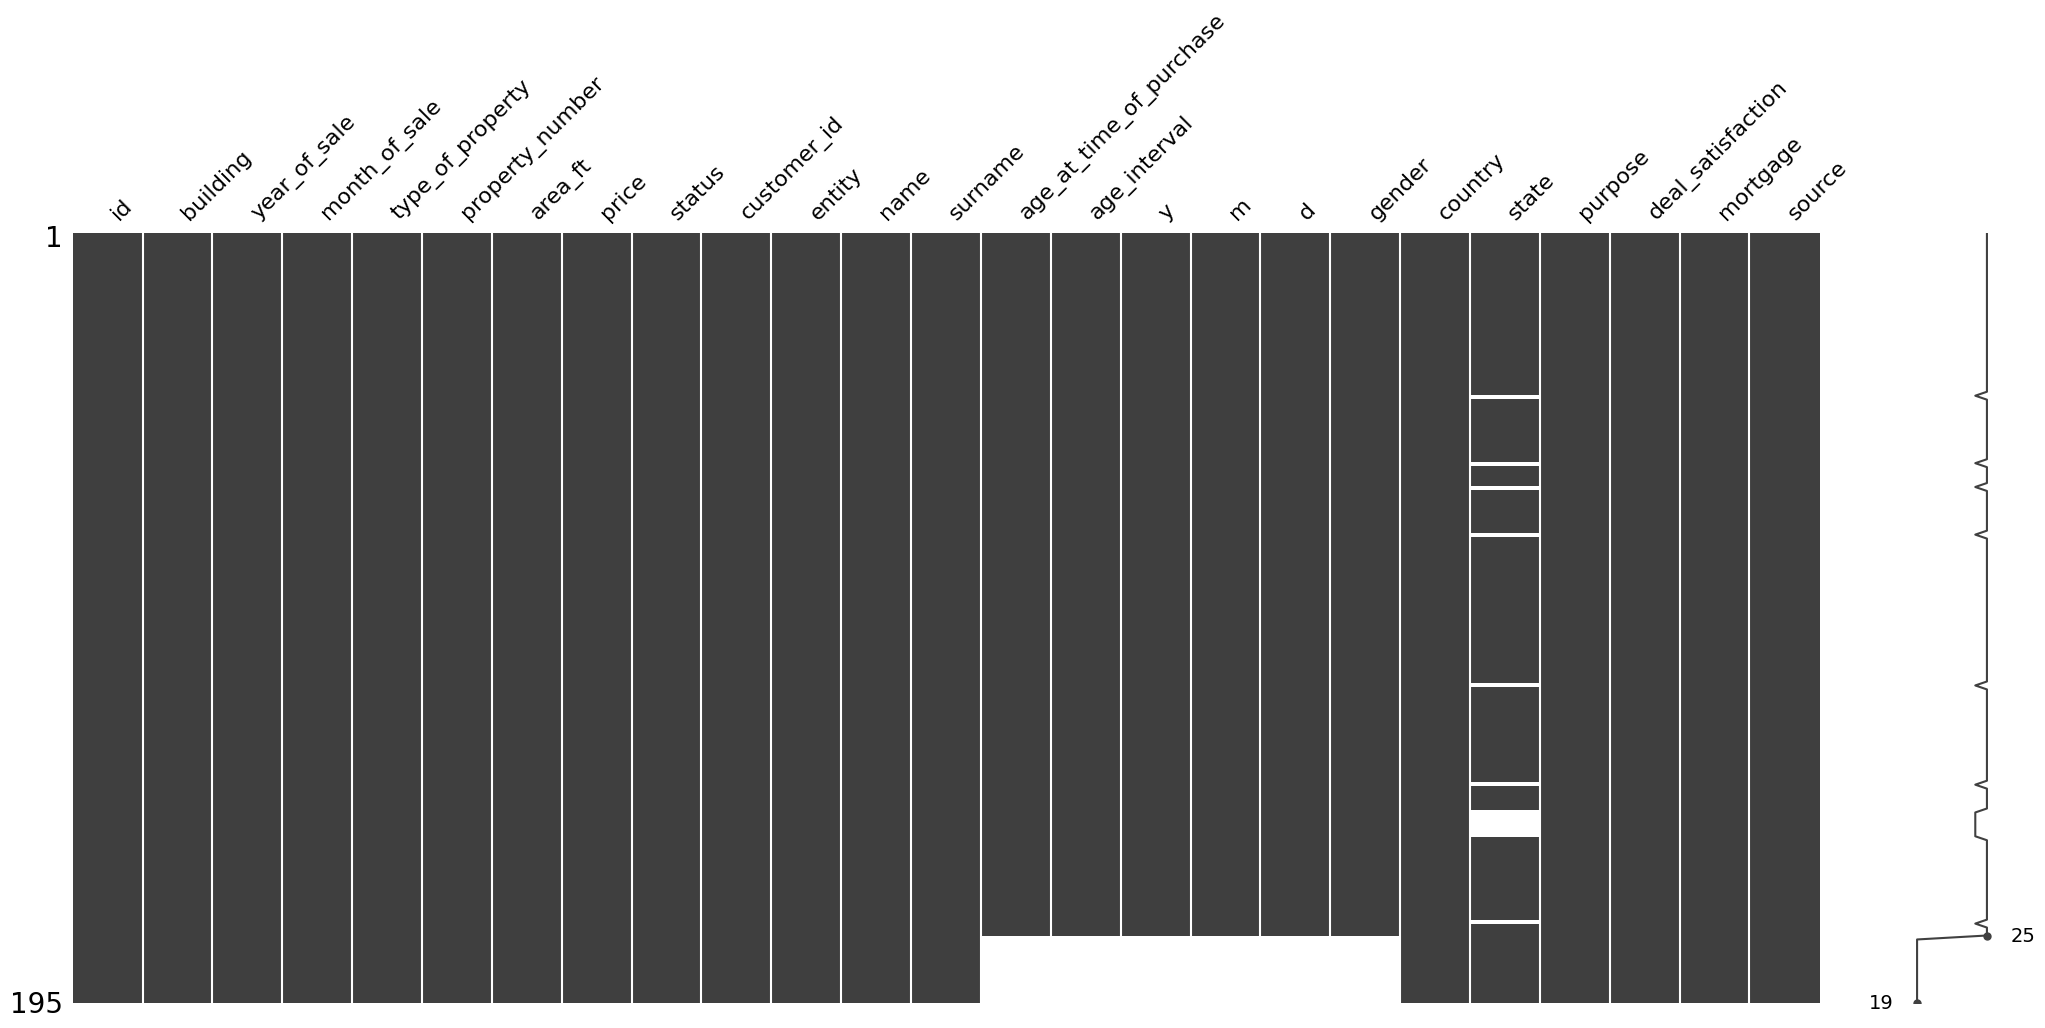

<Figure size 1500x900 with 0 Axes>

In [12]:
import missingno as msno

msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

In [13]:
arrays = [
    df.age_interval.isnull(),
    df.y.isnull(),
    df.m.isnull(),
    df.d.isnull(),
    df.gender.isnull()
]    
all([np.array_equal(a, b) for a, b in zip(arrays, arrays[1:])])

True

Т.е. использовать их для восстановления значений 'age_interval' не получится. Поэтому можем смело их убирать.

In [14]:
duplicate_features = ['age_at_time_of_purchase', 'y', 'm', 'd']
df.drop(duplicate_features, axis=1, inplace=True)

Датасет после удаления дублирующих признаков.

In [15]:
df.head()

,id,building,year_of_sale,month_of_sale,type_of_property,property_number,area_ft,price,status,customer_id,...,name,surname,age_interval,gender,country,state,purpose,deal_satisfaction,mortgage,source
0,1030,1,2005,11,Apartment,30,743.09,246172.68,Sold,C0028,...,Madalyn,Mercer,18-25,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,246331.90,Sold,C0027,...,Lara,Carrillo,18-25,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,209280.91,Sold,C0112,...,Donavan,Flowers,18-25,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,452667.01,Sold,C0160,...,Darien,Dorsey,18-25,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,467083.31,Sold,C0014,...,Alessandra,Perry,18-25,F,USA,California,Home,4,No,Agency


#### 4. Анализ и обработка пропусков

##### 4.1 Выведем матрицу пропущенных значений в разрезе признаков ещё раз

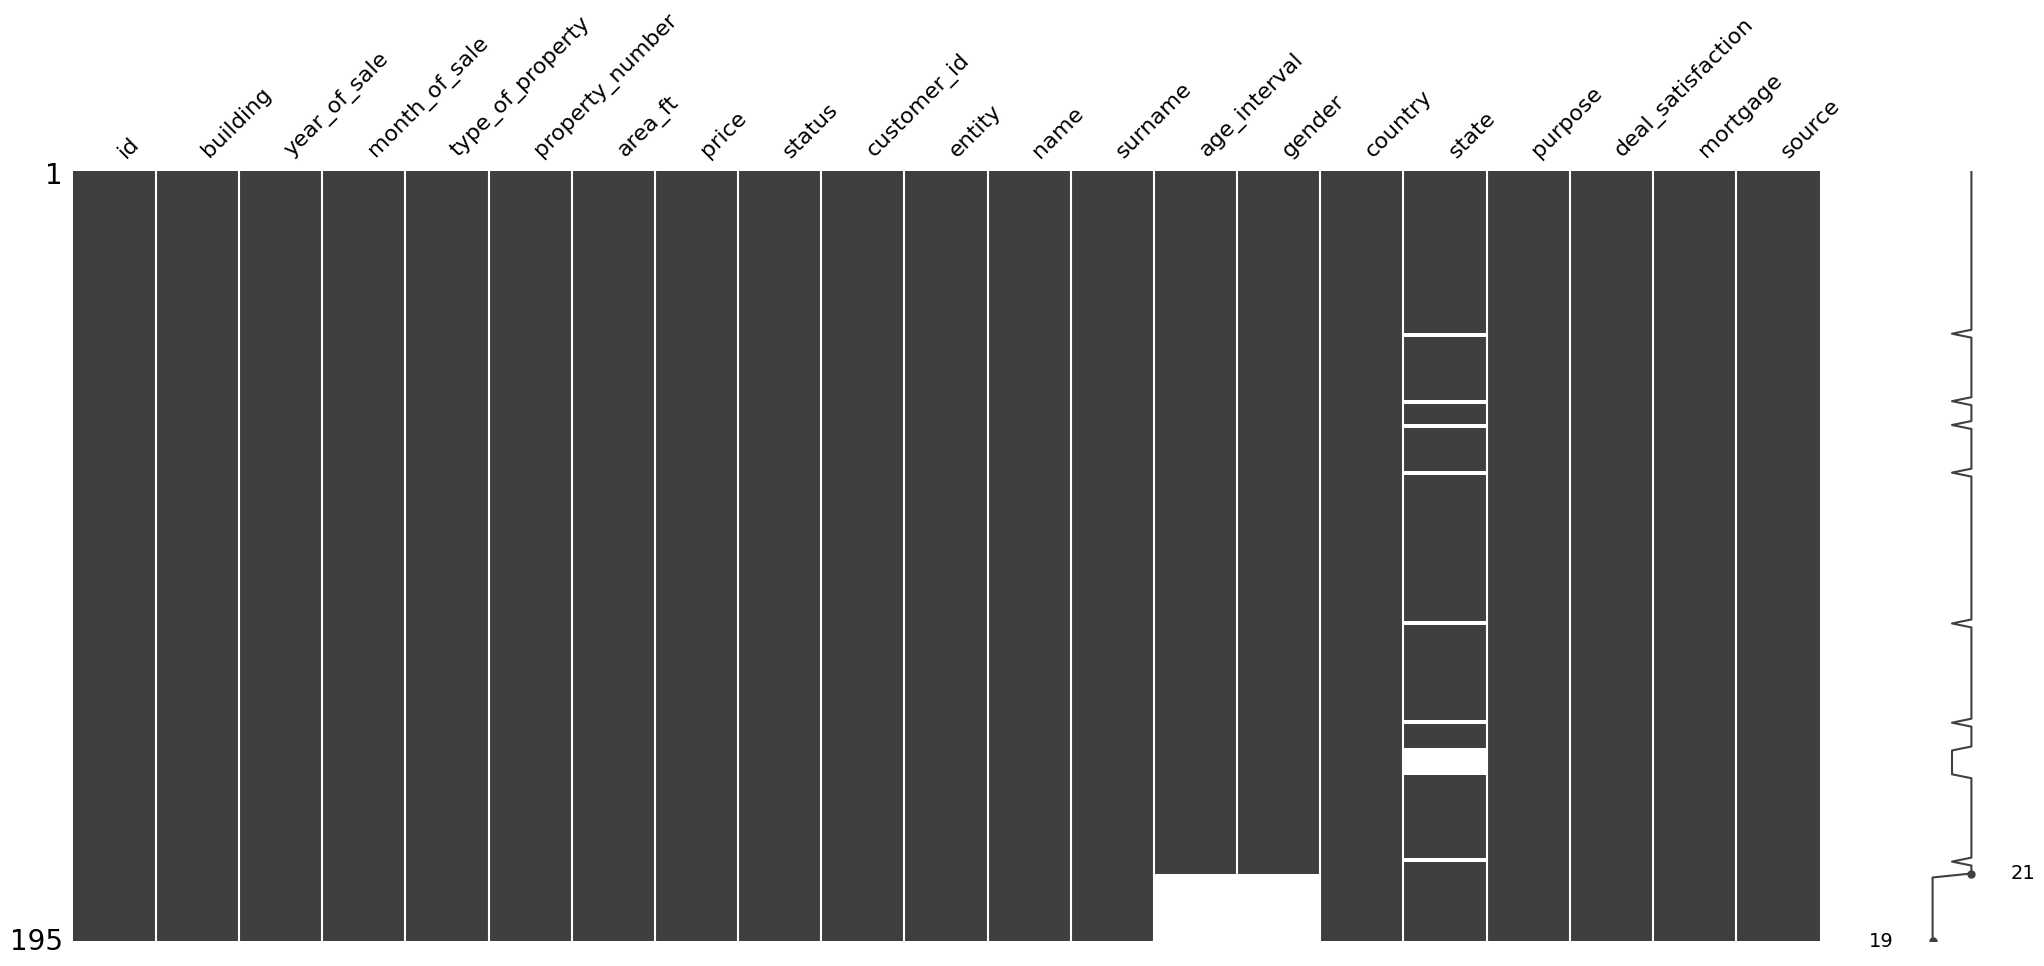

<Figure size 1500x900 with 0 Axes>

In [16]:
import missingno as msno

msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

По результатам данной матрицы мы видим, что большая часть признаков 'Age interval' и 'Gender' имеют пропуски для последних наблюдений. Так же наблюдаются пропуски для признака State.

##### 4.2 Анализ и обработка пропусков

##### 4.2.1 Анализ пропусков в признаке age_interval

Для принятия решения о способе обработки пропусков выведем соответствующие наблюдения для их анализа.

In [17]:
df[df.age_interval.isnull()]

,id,building,year_of_sale,month_of_sale,type_of_property,property_number,area_ft,price,status,customer_id,...,name,surname,age_interval,gender,country,state,purpose,deal_satisfaction,mortgage,source
178,1005,1,2004,3,Office,5,410.71,117564.07,Sold,C0001,...,Kamd,Co,NaN,NaN,USA,California,Investment,5,No,Agency
179,1009,1,2004,11,Office,9,1200.82,317196.40,Sold,C0012,...,Bridger CAL,Co,NaN,NaN,USA,Nevada,Investment,5,No,Website
180,1009,1,2004,11,Office,10,800.96,264142.16,Sold,C0012,...,Bridger CAL,Co,NaN,NaN,USA,Nevada,Investment,4,No,Website
181,1011,1,2005,9,Office,11,827.87,222947.21,Sold,C0025,...,Abdiel,Co,NaN,NaN,USA,Nevada,Investment,5,Yes,Website
182,1007,1,2005,12,Apartment,7,775.69,250312.53,Sold,C0029,...,Kenyon,Co,NaN,NaN,USA,Nevada,Investment,1,Yes,Website
183,1008,1,2005,12,Office,8,775.69,246050.40,Sold,C0029,...,Kenyon,Co,NaN,NaN,USA,California,Investment,1,Yes,Website
184,2038,2,2006,10,Apartment,38,1604.75,529317.28,Sold,C0055,...,Kylax,Co,NaN,NaN,USA,California,Investment,5,No,Website
185,2001,2,2004,3,Apartment,1,587.28,169158.29,Sold,C0121,...,Esther,Co,NaN,NaN,USA,California,Home,3,Yes,Website
186,1013,1,2005,7,Apartment,13,756.21,206958.71,Sold,C0174,...,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website
187,1014,1,2005,7,Apartment,14,743.09,206445.42,Sold,C0174,...,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [18]:
arrays = [
    df.age_interval.isnull(),
    df.entity == 'Firm'
]    
all([np.array_equal(a, b) for a, b in zip(arrays, arrays[1:])])

True

Видим, что у всех наблюдений, в которых признак age_interval пропущен, в качестве значения фамилии используеются одно и то же значение.<br>И в качестве entity указано Firm.<br>Т.е. это корпоративные клиенты, а Co(COrporate) спец. значение, которое используется для них в качестве фамилии.<br>Что объясняет пропуски признаков age_interval и gender для этих наблюдений. <br>Удалять наблюдения, в которых данные признаки отсутствует нецелесообразно, т.к. они не оказывают влияния на оценку данных признаков у образа целевого клиента.

##### 4.2.2 Анализ пропусков в признаке state

Взглянем на наблюдения, в которых данных признак пропущен.

In [19]:
df[df.state.isnull()]

,id,building,year_of_sale,month_of_sale,type_of_property,property_number,area_ft,price,status,customer_id,...,name,surname,age_interval,gender,country,state,purpose,deal_satisfaction,mortgage,source
41,1032,1,2005,1,Apartment,32,782.25,215410.28,Sold,C0015,...,Lauryn,Patrick,36-45,F,Belgium,NaN,Home,2,No,Agency
58,2025,2,2007,2,Apartment,25,927.83,315733.15,Sold,C0070,...,Aleksandra,Karenina,36-45,F,Russia,NaN,Home,1,No,Agency
64,2005,2,2006,9,Apartment,5,785.48,257183.48,Sold,C0047,...,Alejandra,Greer,36-45,F,Denmark,NaN,Investment,1,No,Agency
76,3049,3,2007,4,Apartment,49,1283.45,338181.18,Sold,C0084,...,Diego,Mendez,36-45,M,Mexico,NaN,Home,3,No,Agency
114,2003,2,2006,12,Apartment,3,927.08,289727.99,Sold,C0063,...,Piotr,Aleksandrov,46-55,M,Russia,NaN,Investment,3,No,Agency
139,3050,3,2006,11,Apartment,50,977.87,248274.31,Sold,C0059,...,Elena,Petrova,56-65,F,Russia,NaN,Home,3,Yes,Agency
146,2019,2,2007,3,Apartment,19,649.80,177555.06,Sold,C0079,...,Xavier,Faulkner,56-65,M,Canada,NaN,Investment,5,No,Website
147,2021,2,2007,4,Apartment,21,785.48,217748.48,Sold,C0079,...,Xavier,Faulkner,56-65,M,Canada,NaN,Investment,5,No,Website
148,2027,2,2007,4,Apartment,27,785.48,247739.44,Sold,C0079,...,Xavier,Faulkner,56-65,M,Canada,NaN,Investment,5,No,Website
149,2052,2,2007,3,Apartment,52,1615.29,484458.03,Sold,C0079,...,Xavier,Faulkner,56-65,M,Canada,NaN,Investment,5,No,Website


Взглянем на наблюдения, в которых данных признак указан.

In [20]:
df[df.state.notnull()].head()

,id,building,year_of_sale,month_of_sale,type_of_property,property_number,area_ft,price,status,customer_id,...,name,surname,age_interval,gender,country,state,purpose,deal_satisfaction,mortgage,source
0,1030,1,2005,11,Apartment,30,743.09,246172.68,Sold,C0028,...,Madalyn,Mercer,18-25,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,246331.90,Sold,C0027,...,Lara,Carrillo,18-25,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,209280.91,Sold,C0112,...,Donavan,Flowers,18-25,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,452667.01,Sold,C0160,...,Darien,Dorsey,18-25,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,467083.31,Sold,C0014,...,Alessandra,Perry,18-25,F,USA,California,Home,4,No,Agency


Можно предположить, что признак state указан только для USA. Проверим это.

In [21]:
print(sum(df.state.notnull()))
print(sum(df.country == 'USA'))

181
165


Видим, что количество наблюдений со страной USA отличается от количества наблюдений с указанным штатом.

Выведем наблюдения, для которых state указан и страна не USA.

In [22]:
df[(df.country != 'USA') & (df.state.notnull())]

,id,building,year_of_sale,month_of_sale,type_of_property,property_number,area_ft,price,status,customer_id,...,name,surname,age_interval,gender,country,state,purpose,deal_satisfaction,mortgage,source
32,3016,3,2007,4,Apartment,16,697.89,226342.80,Sold,C0091,...,Gordon,Brown,26-35,M,UK,Arizona,Investment,4,No,Agency
40,4005,4,2007,11,Apartment,5,1121.95,344530.89,Sold,C0142,...,Kassidy,Vega,26-35,F,USA,California,Home,5,No,Website
46,4006,4,2006,7,Apartment,6,733.19,222138.72,Sold,C0150,...,Emmett,Estes,36-45,M,USA,California,Home,3,No,Website
71,3017,3,2007,12,Apartment,17,743.41,205098.21,Sold,C0162,...,Araceli,Nelson,36-45,M,Germany,California,Investment,5,No,Agency
82,3042,3,2007,7,Apartment,42,781.07,213942.56,Sold,C0114,...,Jakobe,Bailey,36-45,M,UK,California,Investment,4,No,Agency
118,2057,2,2006,9,Apartment,57,1396.86,382277.15,Sold,C0044,...,Ramiro,Oneill,46-55,M,USA,California,Home,4,No,Agency
120,3032,3,2007,8,Apartment,32,923.21,242740.66,Sold,C0118,...,Dangelo,Shea,46-55,M,Belgium,Arizona,Investment,4,No,Website
186,1013,1,2005,7,Apartment,13,756.21,206958.71,Sold,C0174,...,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website
187,1014,1,2005,7,Apartment,14,743.09,206445.42,Sold,C0174,...,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website
188,1019,1,2005,7,Apartment,19,827.87,239341.58,Sold,C0174,...,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


Видим, что в таких наблюдениях как страны указаны USA, UK, Germany, Belgium. <br>
Хотя как условие мы задавали, чтобы страна была не USA. Возможно в значениях есть пробелы.
<br>Проверим. Выведем все уникальные значения стран.

In [23]:
df.country.unique()

array(['USA', 'UK', 'USA ', 'Belgium', 'Russia', 'Denmark', 'Germany',
       'Mexico', 'Canada'], dtype=object)

Идея подтверидались. Видим, что 'USA ' указано как отдельное значение.
<br>Исправим это. Уберем пробелы на концах значений стран.

In [24]:
df.country = df.country.str.strip()

Повторно выведем наблюдения, для которых страна не USA.

In [25]:
df[df.country != 'USA']

,id,building,year_of_sale,month_of_sale,type_of_property,property_number,area_ft,price,status,customer_id,...,name,surname,age_interval,gender,country,state,purpose,deal_satisfaction,mortgage,source
32,3016,3,2007,4,Apartment,16,697.89,226342.80,Sold,C0091,...,Gordon,Brown,26-35,M,UK,Arizona,Investment,4,No,Agency
41,1032,1,2005,1,Apartment,32,782.25,215410.28,Sold,C0015,...,Lauryn,Patrick,36-45,F,Belgium,NaN,Home,2,No,Agency
58,2025,2,2007,2,Apartment,25,927.83,315733.15,Sold,C0070,...,Aleksandra,Karenina,36-45,F,Russia,NaN,Home,1,No,Agency
64,2005,2,2006,9,Apartment,5,785.48,257183.48,Sold,C0047,...,Alejandra,Greer,36-45,F,Denmark,NaN,Investment,1,No,Agency
71,3017,3,2007,12,Apartment,17,743.41,205098.21,Sold,C0162,...,Araceli,Nelson,36-45,M,Germany,California,Investment,5,No,Agency
76,3049,3,2007,4,Apartment,49,1283.45,338181.18,Sold,C0084,...,Diego,Mendez,36-45,M,Mexico,NaN,Home,3,No,Agency
82,3042,3,2007,7,Apartment,42,781.07,213942.56,Sold,C0114,...,Jakobe,Bailey,36-45,M,UK,California,Investment,4,No,Agency
114,2003,2,2006,12,Apartment,3,927.08,289727.99,Sold,C0063,...,Piotr,Aleksandrov,46-55,M,Russia,NaN,Investment,3,No,Agency
120,3032,3,2007,8,Apartment,32,923.21,242740.66,Sold,C0118,...,Dangelo,Shea,46-55,M,Belgium,Arizona,Investment,4,No,Website
139,3050,3,2006,11,Apartment,50,977.87,248274.31,Sold,C0059,...,Elena,Petrova,56-65,F,Russia,NaN,Home,3,Yes,Agency


Видим, что для некоторых из них указан штат, что является некорректным, т.к. в Бельгии нет такого штата как Arizona, аналогично как в Германии нет штата Калифорния.<br>Поставим null значение штата для всех стран кроме USA.

In [26]:
df.loc[df.country != 'USA', 'state'] = np.NAN

In [27]:
df[df.country != 'USA']

,id,building,year_of_sale,month_of_sale,type_of_property,property_number,area_ft,price,status,customer_id,...,name,surname,age_interval,gender,country,state,purpose,deal_satisfaction,mortgage,source
32,3016,3,2007,4,Apartment,16,697.89,226342.80,Sold,C0091,...,Gordon,Brown,26-35,M,UK,NaN,Investment,4,No,Agency
41,1032,1,2005,1,Apartment,32,782.25,215410.28,Sold,C0015,...,Lauryn,Patrick,36-45,F,Belgium,NaN,Home,2,No,Agency
58,2025,2,2007,2,Apartment,25,927.83,315733.15,Sold,C0070,...,Aleksandra,Karenina,36-45,F,Russia,NaN,Home,1,No,Agency
64,2005,2,2006,9,Apartment,5,785.48,257183.48,Sold,C0047,...,Alejandra,Greer,36-45,F,Denmark,NaN,Investment,1,No,Agency
71,3017,3,2007,12,Apartment,17,743.41,205098.21,Sold,C0162,...,Araceli,Nelson,36-45,M,Germany,NaN,Investment,5,No,Agency
76,3049,3,2007,4,Apartment,49,1283.45,338181.18,Sold,C0084,...,Diego,Mendez,36-45,M,Mexico,NaN,Home,3,No,Agency
82,3042,3,2007,7,Apartment,42,781.07,213942.56,Sold,C0114,...,Jakobe,Bailey,36-45,M,UK,NaN,Investment,4,No,Agency
114,2003,2,2006,12,Apartment,3,927.08,289727.99,Sold,C0063,...,Piotr,Aleksandrov,46-55,M,Russia,NaN,Investment,3,No,Agency
120,3032,3,2007,8,Apartment,32,923.21,242740.66,Sold,C0118,...,Dangelo,Shea,46-55,M,Belgium,NaN,Investment,4,No,Website
139,3050,3,2006,11,Apartment,50,977.87,248274.31,Sold,C0059,...,Elena,Petrova,56-65,F,Russia,NaN,Home,3,Yes,Agency


#### 5. Составление типичного портрета целевого клиента компании

##### 5.1 Анализ пола и возраста

Для оценки одного категориального признака в разрезе другого нам может подойти bar chart.

In [28]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

df_temp = df.pivot_table(index='age_interval', columns='gender', values='id', aggfunc='count')

trace0 = go.Bar(
    x=df_temp.index,
    y=df_temp.M,
    name='Male',
    orientation = 'v'
)

trace1 = go.Bar(
    x=df_temp.index,
    y=df_temp.F,
    name='Female',
    orientation = 'v'
)

data = [trace0, trace1]
layout = {'title': 'Распределение по возрастным группам'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

По приведённому график видно, что практически по всем возрастным группам (кроме одной 18-25) в большинстве своём клиентами являются мужчины.
<br>Среди мужчин большинство относится к возрастным группам 36-45 и 46-55 лет. Эти возрастные группы представлены практически одинаково.<br><br>Подводя итог оценки этих признаков, можем сделать вывод, что нашими целевыми клиентами являются мужчины в возрасте от 36 до 55 лет.

##### 5.2 Анализ типа покупателя с учётом типа и цели покупки недвижимости

Построим для каждого типа жилья свой график, отображающий количество покупок с той или иной целью для каждого из типов покупателей ('Individual', 'Firm').

In [29]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots

init_notebook_mode(connected=True)

fig = make_subplots(rows=1, cols=len(df.type_of_property.unique()), shared_yaxes=True)

for i, type_of_property in enumerate(df.type_of_property.unique()):
    df_temp = df[df.type_of_property==type_of_property].pivot_table(index='purpose', columns='entity', aggfunc='count', values='id', fill_value=0)

    trace0 = go.Bar(
        x=df_temp.index,
        y=df_temp.Individual,
        name='Individual',
        orientation = 'v',
        marker=dict(color='royalblue'),
        showlegend=True if i == 0 else False
    )

    trace1 = go.Bar(
        x=df_temp.index,
        y=df_temp.Firm,
        name='Firm',
        orientation = 'v',
        marker=dict(color='salmon'),
        showlegend=True if i == 0 else False
    )

    fig.add_trace(trace0, row=1, col=i+1)
    fig.add_trace(trace1, row=1, col=i+1)

fig.update_layout(
    annotations=[
        dict(text='Apartments', x=0.17, y=1.0, xref='paper', yref='paper', showarrow=False, align='center'),
        dict(text='Offices', x=0.82, y=1.0, xref='paper', yref='paper', showarrow=False, align='center')
    ]
)

fig.show()

По построенным графикам отчётливо видно, что большинство сделок заключается по продаже квартир индивидуальным физ. лицами, которые приобретают их для проживания.

##### 5.2 Анализ площади и стоимости покупаемого жилья

Будет разумно оценить средние значения площади для каждого типа жилья отдельно. Т.к. они приобретаются с разными целями.

Для этого мы можем использовать box-plot.

In [30]:
import plotly.express as px

fig = px.box(df, x="type_of_property", y="area_ft")
fig.show()

Медианная площадь квартир - 785.48 ft<br>
Медианная площадь офисов - 800.96 ft<br><br>
Можем увидеть, что в среднем площади приобретаемых квартир и офис примерно одинаковы, т.к по графику видно, что значения нижних квантилей и медиан для этих типов жилья слабо отличаются.<br>Есть небольшие отличия верхнего квантиля, но они незначительны.<br>При этом для квартир имеются выбросы, т.е. разброс значений здесь более велик.

Построим так же box-plot графики по цене для каждого из типов жилья.

In [31]:
import plotly.express as px

fig = px.box(df, x="type_of_property", y="price")
fig.show()

In [32]:
df[df.type_of_property=='Apartment']['price'].median()

242896.625

In [33]:
df[df.type_of_property=='Office']['price'].median()

246050.4

Медианная стоимость сделок по продаже квартир - $ 242,896.625<br>
Медианная стоимость сделок по продаже офисов - \$ 246,050.4 <br><br>

По данному график создаётся ощущение, что офисы и квартиры стоят примерно одинаково.<br>Чтобы убедиться в том, что оба типа жилья примерно одинаково стоят в расчёте на площадь, построим линии тренда для обоих типов жилья.

In [34]:
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

colors = ['salmon', 'royalblue']

traces = []
for i, type_of_property in enumerate(df.type_of_property.unique()):
    df_temp = df[df.type_of_property==type_of_property]

    scatter_trendline = np.polyfit(df_temp['area_ft'], df_temp['price'], deg=1)
    scatter_trendline_x = np.linspace(df_temp['area_ft'].min(), df_temp['price'].max(), 100)
    scatter_trendline_y = np.polyval(scatter_trendline, scatter_trendline_x)

    scatter_trace = go.Scatter(
        x=df_temp['area_ft'],
        y=df_temp['price'],
        mode='markers',
        name=type_of_property,
        marker=dict(color=colors[i]),
    )

    trendline_trace = go.Scatter(
        x=scatter_trendline_x,
        y=scatter_trendline_y,
        mode='lines',
        name=type_of_property + " trend",
        marker=dict(color=colors[i]),
    )

    traces.append(scatter_trace)
    traces.append(trendline_trace)


layout = go.Layout(title='Scatter Plot Comparison')
fig = go.Figure(data=traces, layout=layout)
fig.update_xaxes(range=[df.area_ft.min(), df.area_ft.quantile(0.9)])
fig.update_yaxes(range=[df.price.min(), df.price.quantile(0.9)])

fig.show()

По данному графику видно, что линии тренда стоимости недвижимости в расчёте на площадь для квартир и офисов примерно совпадают, что позволяет сделать вывод, что стоимость единицы площади для них примерно одинакова.<br>Тогда для оценки средней суммы сделки можем построить box-plot по всем наблюдениям.

In [35]:
import plotly.express as px

fig = px.box(df, y="price")
fig.show()

In [36]:
df['price'].median()

243052.59

Отсюда видим, что медианная стоимость сделки - $ 243,052<br>Медианная стоимость лучше подойдёт для описания средней суммы сделки в данном случае, в виду наличия выбросов.

##### 5.3 Анализ эффективности источников лида

Имеет смысл оценить источники лида в разрезе возраста клиентов, т.к., вероятнее всего, веб-сайты будут менее актуальны для представителее более пожилых возрастных групп.

In [37]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

df_temp = df.pivot_table(index='age_interval', columns='source', values='id', aggfunc='count')

trace0 = go.Bar(
    x=df_temp.index,
    y=df_temp.Website,
    name='Website',
    orientation = 'v'
)

trace1 = go.Bar(
    x=df_temp.index,
    y=df_temp.Client,
    name='Client',
    orientation = 'v'
)

trace2 = go.Bar(
    x=df_temp.index,
    y=df_temp.Agency,
    name='Agency',
    orientation = 'v'
)

data = [trace0, trace1, trace2]
layout = {'title': 'Распределение источников лида по возрастным группам'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

По полученному графику видно, что веб-сайт является эффективным средством привлечения клиентов по всем возрастным группам, что подводит к выводу о целесообразности вложения средств в его развитие и продвижение.

#### 6. Оценка удовлетворённости клиентов на основе обратной связи

Имея числовые значения оценок клиентов для предоставляемых услуг можно получить общую картину.

In [38]:
import plotly.express as px

fig = go.Figure(data=[go.Pie(labels=df.deal_satisfaction, values=df.deal_satisfaction, pull=[0.1, 0, 0, 0, 0.1])])
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

По графику видно, что большинство клиентов довольны работой. Более половины клиентов оценило работу максимально возможным балом, суммарно более 70% клиетов дали оценки не ниже 4, что является неплохим показателем (наверное :) ).

Т.е. можно сказать, что, в целом, клиенты довольны оказанными услугами.